In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


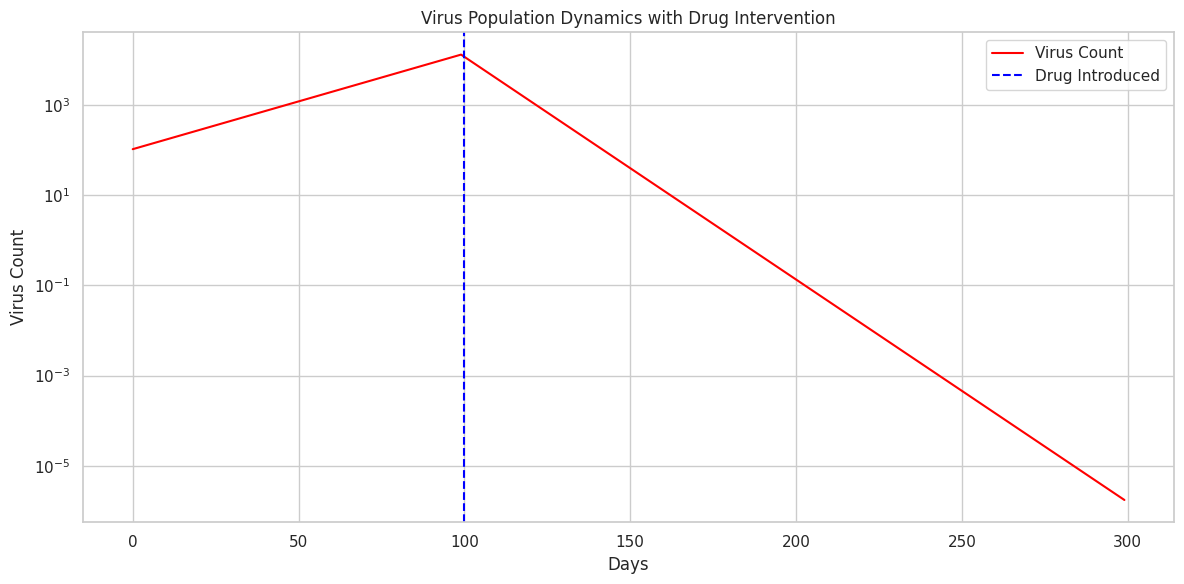

Final virus population on day 300: 0.00
Reduction in virus count since drug introduction: 100.00%


In [2]:
# Virus Population Dynamics Simulation with Drug Treatment
# Author: Tahiya Rahman
# Description: This Jupyter notebook simulates virus population dynamics and models the effects of drug treatment.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
time_steps = 300  # days
initial_virus = 100  # initial virus particles
replication_rate = 1.05  # virus replication per time step
drug_start_day = 100  # when drug starts
kill_rate = 0.15  # percentage of virus killed per time step after drug

# Lists to hold values
virus_population = []
days = list(range(time_steps))

# Simulate dynamics
virus_count = initial_virus
for day in days:
    if day >= drug_start_day:
        virus_count = virus_count * replication_rate * (1 - kill_rate)
    else:
        virus_count = virus_count * replication_rate
    virus_population.append(virus_count)

# Dataframe for visualization
data = pd.DataFrame({
    'Day': days,
    'Virus Population': virus_population
})

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day', y='Virus Population', color="red", label="Virus Count")
plt.axvline(x=drug_start_day, color='blue', linestyle='--', label='Drug Introduced')
plt.title("Virus Population Dynamics with Drug Intervention")
plt.xlabel("Days")
plt.ylabel("Virus Count")
plt.yscale('log')  # log scale for visibility
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics
final_population = virus_population[-1]
reduction = ((virus_population[drug_start_day-1] - final_population) / virus_population[drug_start_day-1]) * 100
print(f"Final virus population on day {time_steps}: {final_population:.2f}")
print(f"Reduction in virus count since drug introduction: {reduction:.2f}%")
